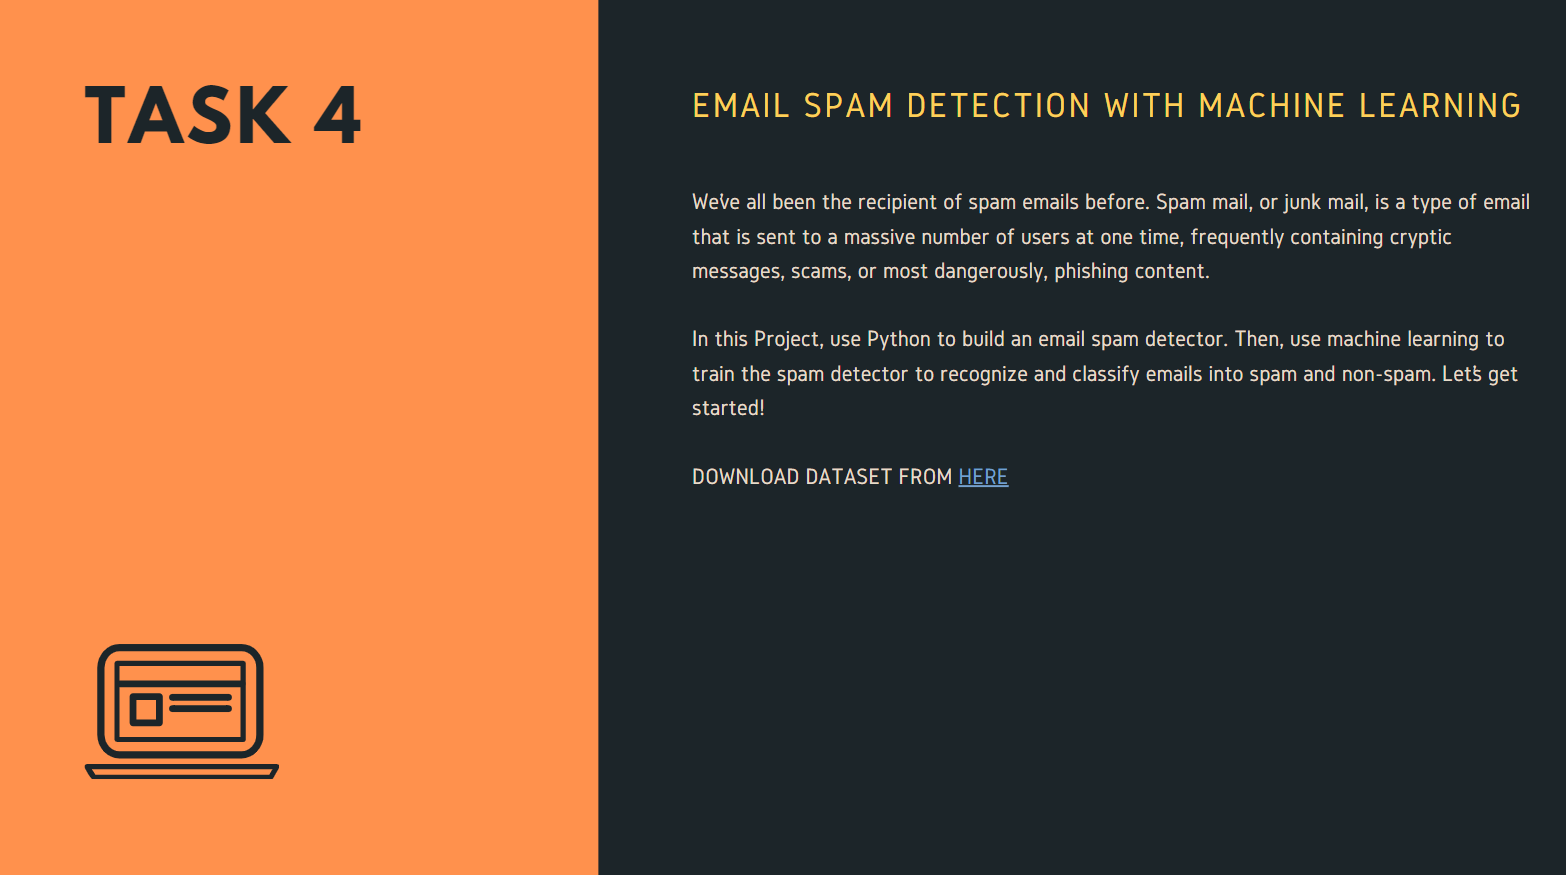

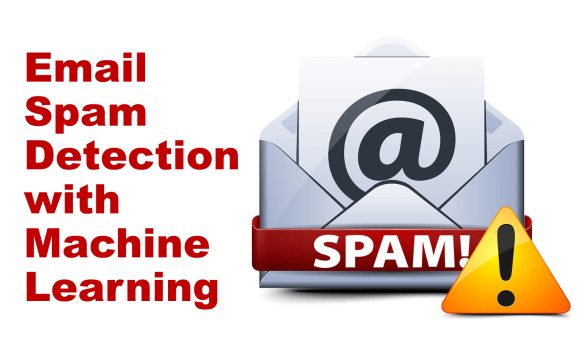

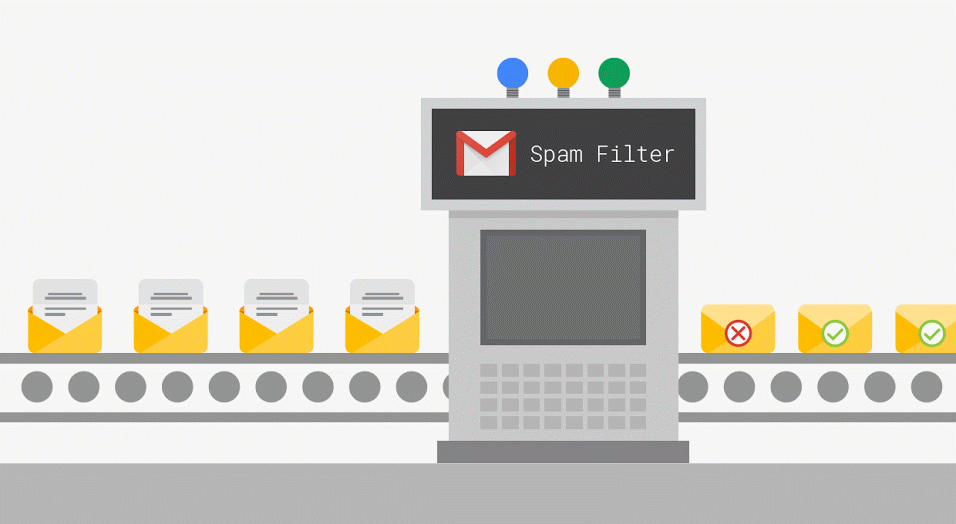

## Importing Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [94]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [95]:
df=pd.read_csv('spam.csv',encoding="latin-1")
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [96]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [97]:
df.shape

(5572, 5)

In [98]:
df.size

27860

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [100]:
df.describe()

v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2

In [101]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Exploratory Data Analysis

In [102]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [103]:
df=df.rename(columns={'v1':'Spam/Non-Spam','v2':'Message'})

In [104]:
df.head()

Spam/Non-Spam                                            Message
0           ham  Go until jurong point, crazy.. Available only ...
1           ham                      Ok lar... Joking wif u oni...
2          spam  Free entry in 2 a wkly comp to win FA Cup fina...
3           ham  U dun say so early hor... U c already then say...
4           ham  Nah I don't think he goes to usf, he lives aro...

In [105]:
df.isnull().sum()

Spam/Non-Spam    0
Message          0
dtype: int64

In [106]:
df.duplicated().sum()

403

In [107]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [108]:
df.size
df.shape

(5169, 2)

In [109]:
#Encoding Spam/Not-spam(Target) feature
#enc= LabelEncoder()
#df["Spam/Non-Spam"] = enc.fit_transform(df["Spam/Non-Spam"])
df['Spam/Non-Spam'] = np.where(df['Spam/Non-Spam'] == 'spam',1,0)
df.head()

Spam/Non-Spam                                            Message
0              0  Go until jurong point, crazy.. Available only ...
1              0                      Ok lar... Joking wif u oni...
2              1  Free entry in 2 a wkly comp to win FA Cup fina...
3              0  U dun say so early hor... U c already then say...
4              0  Nah I don't think he goes to usf, he lives aro...

In [110]:
df["Spam/Non-Spam"].value_counts()

0    4516
1     653
Name: Spam/Non-Spam, dtype: int64

## Data visualization & Plotting

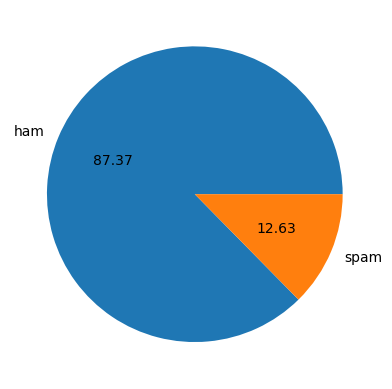

In [111]:
plt.pie(df["Spam/Non-Spam"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

## Building the model

In [113]:
features = df['Message']
target = df['Spam/Non-Spam']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (4135,)
Test set of features:  (1034,)
Target for train:  (4135,)
Target for test:  (1034,)


Count Vectorizer transforms text into a vector on the basis of the frequency/count of each word that occurs in entire text.It converts each word in Train dataset into vectors for using them in further text analysis.

In [119]:
cv=CountVectorizer()
X_train_vec=cv.fit_transform(X_train)
X_test_vec=cv.transform(X_test)

# Model selection & Training

## Logistic Regression

In [128]:
log_reg=LogisticRegression()
log_reg.fit(X_train_vec,y_train)
y_pred=log_reg.predict(X_train_vec)
print("Accuracy of Logistic Regression model(Training set):",accuracy_score(y_train,y_pred)*100)

Accuracy of Logistic Regression model(Training set): 99.73397823458284


In [129]:
y_preds=log_reg.predict(X_test_vec)
print("Accuracy of Logistic Regression model(Test set):",accuracy_score(y_test,y_preds)*100)

Accuracy of Logistic Regression model(Test set): 98.06576402321083
